In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':200000000,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Commodities'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [2]:
quote = Quote(symbols, 70, 20)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-04-26 to 2019-07-05 - 28'

In [3]:
stat = quote.statistics()
stat = stat[(stat['drawdown'] < 8) & (stat['shrp'] > 0.4)]
print(len(stat))
stat

12


,len,mean,std,shrp,drawdown
Symbols,,,,,
PHYS,29,5.357993,3.246831,1.601335,2.631572
GLD,29,4.968924,3.172736,1.516103,2.667662
SGOL,29,4.987932,3.197332,1.510385,2.692057
BAR,29,4.966250,3.191032,1.506572,2.700990
IAU,29,4.989043,3.222295,1.499029,2.716592
GLDM,29,4.973713,3.217538,1.496481,2.746475
CEF,29,4.154039,3.117576,1.281543,2.663438
DBA,29,3.124783,2.363068,1.255170,4.012349
GLTR,29,4.061948,3.658201,1.066977,3.584793


Populating the interactive namespace from numpy and matplotlib
evicted SGOL 0.9999045171487809
evicted BAR 0.9995016216904287
evicted IAU 0.9997660402305507
evicted GLDM 0.9997496820963767
evicted SLV 0.9993527253970417
evicted CEF 0.9808001007207705
evicted SIVR 0.9820022367794081
evicted GLD 0.9961552602179655
evicted PSLV 0.9793295821700713
evicted GLTR 0.973531644406389
{'DBA': 0.55, 'PHYS': 0.45}


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,29.0,4.118996,1.542750,0.237653,2.951661,4.561174,5.230667,6.111192,2.567017,2.110797
PHYS,29.0,5.357993,3.246831,-0.195126,3.816041,4.878049,6.988189,11.545982,1.601335,2.631572
DBA,29.0,3.124783,2.363068,-1.081083,0.967936,3.269591,4.914932,7.138261,1.255170,4.012349


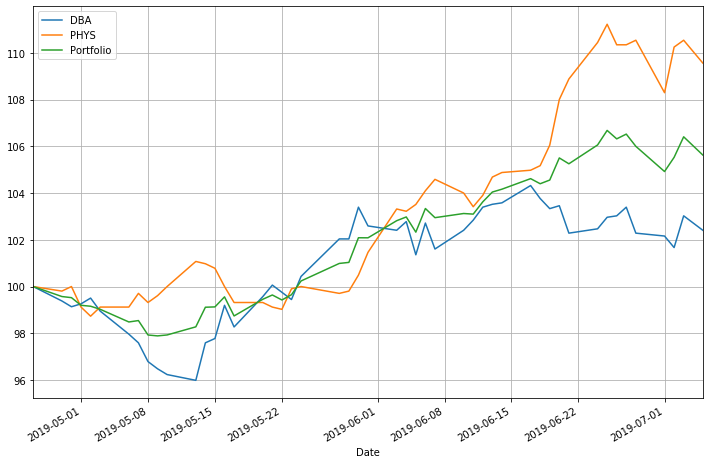

In [4]:
%pylab inline
quote.drop_mask()
ratio = quote.optimize_portfolio(stat.index)
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)

In [5]:
quote.setup_mask(['GLD', 'DBA'])
quote.find_optimal_ratio()

({'GLD': 0.45, 'DBA': 0.55}, 3.9488, 1.4982, 2.5297)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,29.0,3.942378,1.491768,0.211700,2.978311,4.314575,4.942309,6.101125,2.536351,2.048745
GLD,29.0,4.968924,3.172736,-0.272272,3.211728,4.404120,6.600082,11.065129,1.516103,2.667662
DBA,29.0,3.124783,2.363068,-1.081083,0.967936,3.269591,4.914932,7.138261,1.255170,4.012349


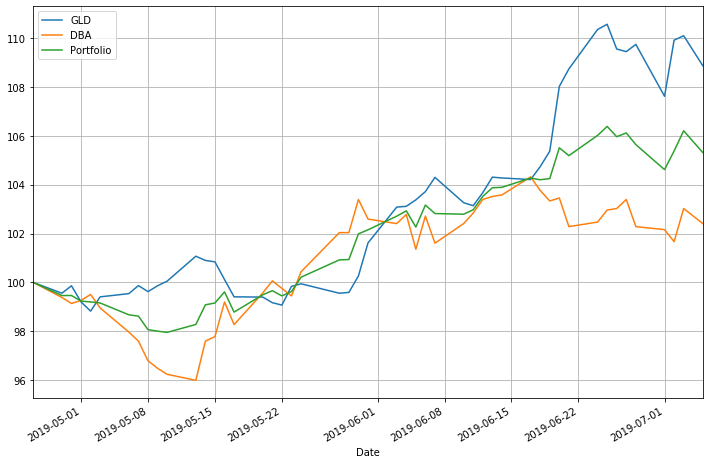

In [6]:
quote.graph({'GLD': 0.45, 'DBA': 0.55})